In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def relu(x):
    return np.maximum(0, x)

## Conceptos fundamentales

In [3]:
# Data
data = np.array([[0, 0], [0.1, 0], [0.2, 0], [0.5, 1], [0.6, 1], [0.7, 1], [0.8, 0], [0.9, 0], [1, 0]])
df = pd.DataFrame(data, columns=['Amount taken (g)', '% Effectiveness'])
df

,Amount taken (g),% Effectiveness
0,0.0,0.0
1,0.1,0.0
2,0.2,0.0
3,0.5,1.0
4,0.6,1.0
5,0.7,1.0
6,0.8,0.0
7,0.9,0.0
8,1.0,0.0


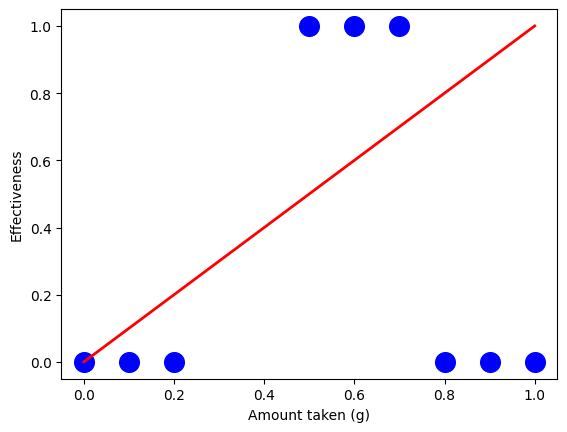

In [4]:
# Dimensions graph
x_dim = 1
y_dim = 1

x_vals = np.linspace(0, 1, 1000) 
y_vals = x_vals    



# Points
plt.scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)

# Example y = x line                
plt.plot(x_vals, y_vals, c="red", linestyle="-", linewidth=2)

plt.xlabel("Amount taken (g)")
plt.ylabel("Effectiveness")
plt.show()


In [4]:
# Upper path
g_1 = 1.43 * df["Amount taken (g)"] - 0.61
t_1 = relu(g_1) * (-3.89)

# Lower path
g_2 = 2.63 * df["Amount taken (g)"] - 0.27
t_2 = relu(g_2) * 1.35

# Network output
t = t_1 + t_2
upper_nn = np.array(list(zip(df["Amount taken (g)"], t_1)))
lower_nn = np.array(list(zip(df["Amount taken (g)"], t_2)))
whole_nn = np.array(list(zip(df["Amount taken (g)"], t)))

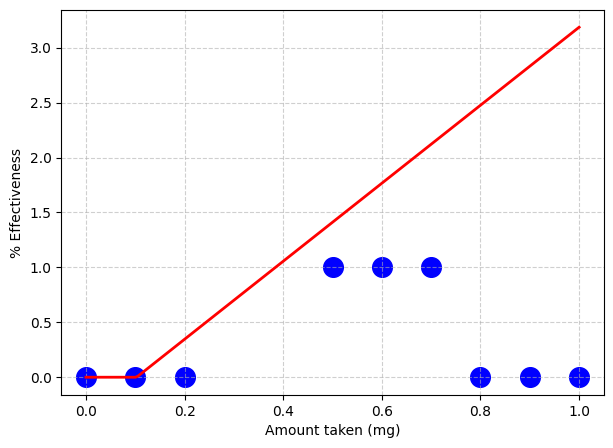

In [111]:
# Points
plt.figure(figsize=(7,5))
plt.scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)

# Example line fit by NN
plt.plot(lower_nn[:,0], lower_nn[:,1], c="red", linestyle="-", linewidth=2)

plt.xlabel("Amount taken (mg)")
plt.ylabel("% Effectiveness")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


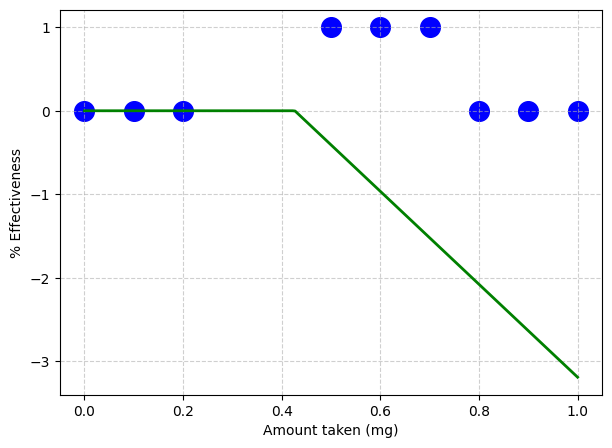

In [107]:
# Points
plt.figure(figsize=(7,5))
plt.scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)

# Example line fit by NN
plt.plot(upper_nn[:,0], upper_nn[:,1], c="green", linestyle="-", linewidth=2)

plt.xlabel("Amount taken (mg)")
plt.ylabel("% Effectiveness")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

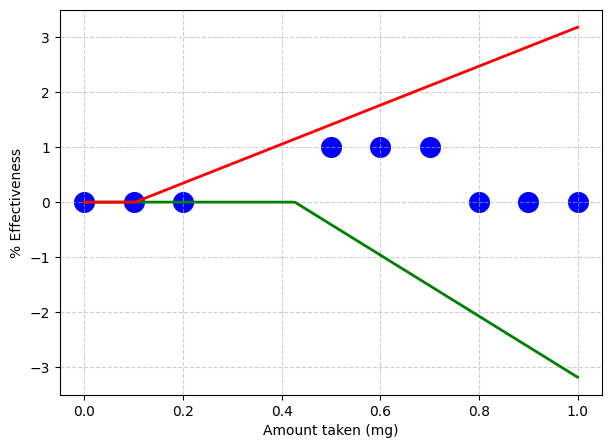

In [112]:
# Points
plt.figure(figsize=(7,5))
plt.scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)

# Example line fit by NN
plt.plot(upper_nn[:,0], upper_nn[:,1], c="green", linestyle="-", linewidth=2)
plt.plot(lower_nn[:,0], lower_nn[:,1], c="red", linestyle="-", linewidth=2)

plt.xlabel("Amount taken (mg)")
plt.ylabel("% Effectiveness")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

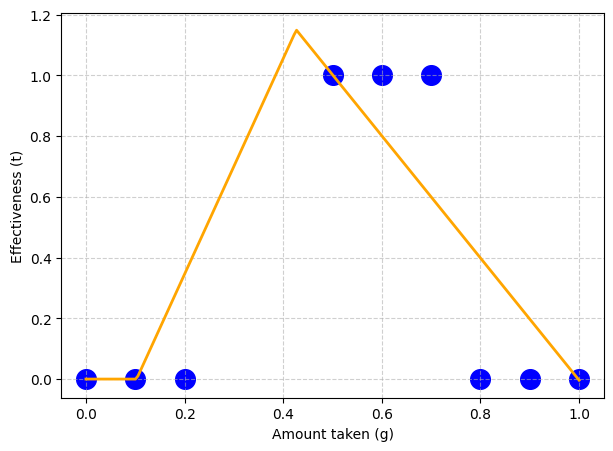

In [109]:
# Plot
plt.figure(figsize=(7,5))
plt.scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)
plt.plot(df["Amount taken (g)"], t, c="orange", linewidth=2)

plt.xlabel("Amount taken (g)")
plt.ylabel("Effectiveness (t)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

When W3 = 0

In [5]:
# Upper path
g_1 = 1.43 * df["Amount taken (g)"] - 0.61
t_1 = relu(g_1) * (0)

# Lower path
g_2 = 2.63 * df["Amount taken (g)"] - 0.27
t_2 = relu(g_2) * 1.35

# Network output
t = t_1 + t_2
upper_nn = np.array(list(zip(df["Amount taken (g)"], t_1)))
lower_nn = np.array(list(zip(df["Amount taken (g)"], t_2)))
whole_nn = np.array(list(zip(df["Amount taken (g)"], t)))

In [26]:
np.array(whole_nn)
pd.DataFrame(np.array(whole_nn), columns=["Amount taken (g)", "Predicted"])

,Amount taken (g),Predicted
0,0.0,0.00000
1,0.1,0.00000
2,0.2,0.34560
3,0.5,1.41075
4,0.6,1.76580
5,0.7,2.12085
6,0.8,2.47590
7,0.9,2.83095
8,1.0,3.18600


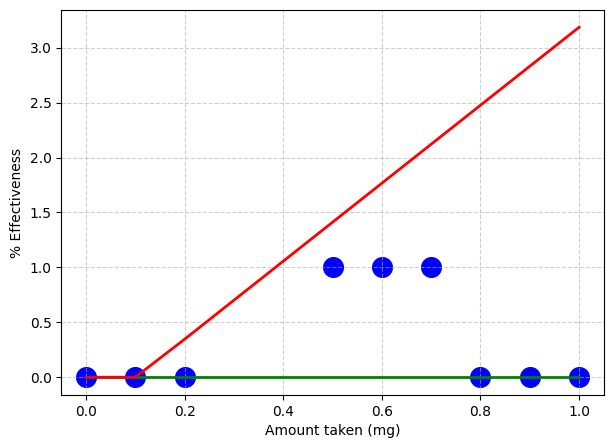

In [7]:
# Points
plt.figure(figsize=(7,5))
plt.scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)

# Example line fit by NN
plt.plot(upper_nn[:,0], upper_nn[:,1], c="green", linestyle="-", linewidth=2)
plt.plot(lower_nn[:,0], lower_nn[:,1], c="red", linestyle="-", linewidth=2)

plt.xlabel("Amount taken (mg)")
plt.ylabel("% Effectiveness")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

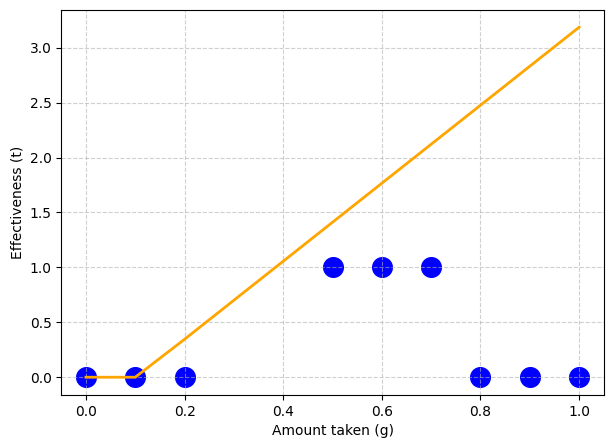

In [8]:
# Plot
plt.figure(figsize=(7,5))
plt.scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)
plt.plot(df["Amount taken (g)"], t, c="orange", linewidth=2)

plt.xlabel("Amount taken (g)")
plt.ylabel("Effectiveness (t)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

For different values of W3

In [7]:
w3 = np.arange(-6, 1, 1)

In [8]:
w3 = range(-6, 1, 1) 

y_true = df["% Effectiveness"].values
ssr_values = []

for i in range(len(w3)):
    # Upper path
    g_1 = 1.43 * df["Amount taken (g)"] - 0.61
    t_1 = relu(g_1) * (w3[i])

    # Lower path
    g_2 = 2.63 * df["Amount taken (g)"] - 0.27
    t_2 = relu(g_2) * 1.35

    # Network output
    t = t_1 + t_2

    # SSR
    residuals = y_true - t
    ssr = np.sum(residuals**2)
    ssr_values.append(ssr)

In [11]:
np.array(ssr_values)

array([ 7.242445 ,  2.2332065,  0.506558 ,  2.0624995,  6.901031 ,
       15.0221525, 26.425864 ])

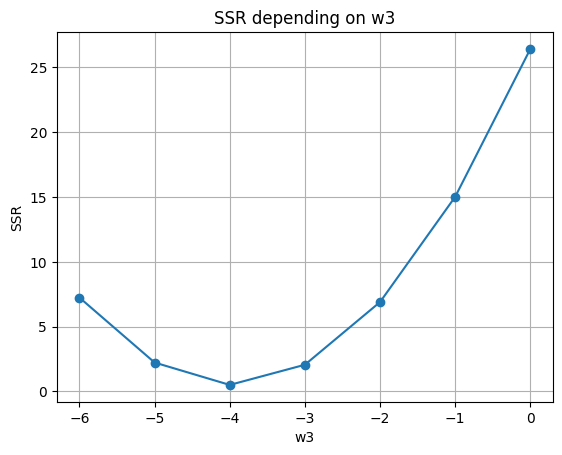

In [ ]:
#  SSR vs w3
plt.plot(list(w3), ssr_values, marker="o")
plt.xlabel("w3")
plt.ylabel("SSR")
plt.title("SSR depending on w3")
plt.grid(True)
plt.show()


In [14]:
SSR_w3 = pd.DataFrame(list(zip(w3, ssr_values)), columns=["w3", "SSR"])
SSR_w3

,w3,SSR
0,-6,7.242445
1,-5,2.233206
2,-4,0.506558
3,-3,2.062499
4,-2,6.901031
5,-1,15.022152
6,0,26.425864


In [7]:
# Manually check value of derivative of SSR at w3 = 0

# Upper path
g_1 = 1.43 * df["Amount taken (g)"] - 0.61
y = relu(g_1)

amount_predicted_y = pd.DataFrame(np.column_stack((whole_nn, y)), columns=["Amount taken (g)", "Predicted", "y"])
amount_predicted_y["Result"] = -2 * (
    amount_predicted_y["Amount taken (g)"] - amount_predicted_y["Predicted"]
) * amount_predicted_y["y"]

amount_predicted_y
#dssr_dw3 = amount_predicted_y["Result"].sum()
#dssr_dw3

,Amount taken (g),Predicted,y,Result
0,0.0,0.00000,0.000,-0.000000
1,0.1,0.00000,0.000,-0.000000
2,0.2,0.34560,0.000,0.000000
3,0.5,1.41075,0.105,0.191257
4,0.6,1.76580,0.248,0.578237
5,0.7,2.12085,0.391,1.111105
6,0.8,2.47590,0.534,1.789861
7,0.9,2.83095,0.677,2.614506
8,1.0,3.18600,0.820,3.585040
